In [3]:
import os, fnmatch

mesh_path = './caesar-fitted-meshes/'
listOfFiles = os.listdir(mesh_path) 
pattern = "CSR*.mat" 

mesh_filenames = []
mesh_files = []

for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
            mesh_files.append(mesh_path+entry)
            mesh_filenames.append(entry[:-4])
            
mesh_files[0]

'./caesar-fitted-meshes/CSR2035A.mat'

In [4]:
import scipy.io

meshes = []

for file in mesh_files:
    meshes.append(scipy.io.loadmat(file))
    
len(meshes)

2381

In [5]:
import itertools

mesh_subset = []
filename_subset = []

for m_sub in itertools.islice(meshes , 0, 100):
     mesh_subset.append(m_sub)
for f_sub in itertools.islice(mesh_filenames , 0, 100):
    filename_subset.append(f_sub)
    
mesh_subset[0]

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Apr 10 14:44:57 2015',
 '__version__': '1.0',
 '__globals__': [],
 'points': array([[  41.03259317,   15.60633787, -217.88854056],
        [  30.14742741,    6.91504415, -209.80270765],
        [  48.58971442,   23.64275444, -222.53930971],
        ...,
        [  87.77095145, -142.66466808, -992.53659039],
        [ 104.2067453 , -123.03034644, -997.26743823],
        [ 140.52781577, -110.99736989, -997.35960975]])}

In [6]:
import pandas as pd

mesh_points = []

for sub in mesh_subset:
    mesh_points.append(sub['points'])

mesh_frames = []
    
for points in mesh_points:
    x,y,z = [], [], []
    for p in points:
        x.append(p[0])
        y.append(p[1])
        z.append(p[2])
    
    datap = {'x':x, 'y':y, 'z':z}
    dfp = pd.DataFrame(data=datap)
    mesh_frames.append(dfp)
    
mesh_frames[0].head(5)

,x,y,z
0,41.032593,15.606338,-217.888541
1,30.147427,6.915044,-209.802708
2,48.589714,23.642754,-222.539310
3,14.146272,-8.614106,-193.746231
4,11.520067,-15.492777,-186.495936


PermissionError: [Errno 13] Permission denied: '/Volumes/CSR2035A'

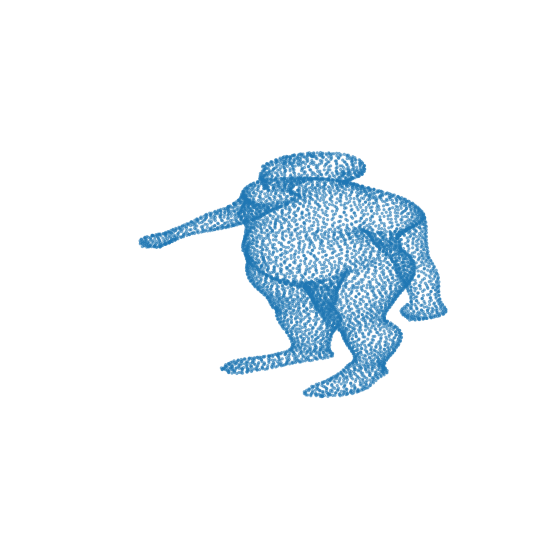

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig5 = plt.figure(1,figsize=(10,10))
ax5 = fig5.add_subplot(111, projection='3d')

img_path = '/Volumes/'
img_prefix = '/test_human-_'
img_suffix = '.jpg'

for mf,mfn in zip(mesh_frames, filename_subset):
    ax5.view_init(azim=270,elev=15)
    ax5.grid(False)
    plt.axis('off')
    ax5.scatter(mf.x,mf.y,mf.z, marker='.', alpha=.5)
    directory = img_path + mfn
    if not os.path.exists(directory):
        os.makedirs(directory)
    for axaz in range(36):
        ax5.view_init(azim=axaz*10,elev=15)
        img_name = str(axaz)
        if(len(str(axaz))>1):
            img_name = '0'+img_name
        else:
            img_name = '00'+img_name
        plt.savefig(directory + img_prefix + img_name + img_suffix, format='jpg')
    ax5.clear()

In [11]:
img_folder_path = '/Volumes/'
listOfFiles = os.listdir(img_folder_path) 
listOfFiles

directory = img_path + mfn
if not os.path.exists(directory):
        os.makedirs(directory)

PermissionError: [Errno 13] Permission denied: '/Volumes/CSR2035A'

In [12]:
from subprocess import call

call(['sips', '-s', 'format', 'gif', 'test_human_*.jpg', '-o', '/animate/', 'human.gif'])



10

In [13]:
call(['gifsicle', '--loop', '--colors', '256', 'est_human_*.gif>test_human.gif'])


1